In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

In [50]:
df = pd.read_csv(r"C:\Users\igish\Documents\Data Science\LJMU\Mental_Health.csv")  # Use 'r' to avoid escape issues

print(df.head())

         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No            No   


In [51]:
df = df.sample(n=50000, random_state=42)

In [52]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 236749 to 118512
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                50000 non-null  object
 1   Gender                   50000 non-null  object
 2   Country                  50000 non-null  object
 3   Occupation               50000 non-null  object
 4   self_employed            49115 non-null  object
 5   family_history           50000 non-null  object
 6   treatment                50000 non-null  object
 7   Days_Indoors             50000 non-null  object
 8   Growing_Stress           50000 non-null  object
 9   Changes_Habits           50000 non-null  object
 10  Mental_Health_History    50000 non-null  object
 11  Mood_Swings              50000 non-null  object
 12  Coping_Struggles         50000 non-null  object
 13  Work_Interest            50000 non-null  object
 14  Social_Weakness          50000 n

In [53]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [54]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [55]:
target = 'treatment' 
X = df.drop(columns=[target])
y = df[target]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        end_time = time.time()
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[name] = accuracy
        print(f"\n{name} Performance:")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print(f"Training & Prediction Time: {end_time - start_time:.2f} seconds")
    return results

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
}


In [59]:
print("\nInitial Model Performance")
initial_results = train_evaluate(models, X_train, X_test, y_train, y_test)


Initial Model Performance

Logistic Regression Performance:
Accuracy: 0.6984
Precision: 0.698391580157631
Recall: 0.6984
F1-score: 0.6983671764339894
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69      4947
           1       0.70      0.71      0.70      5053

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Confusion Matrix:
 [[3407 1540]
 [1476 3577]]
Training & Prediction Time: 0.02 seconds

Decision Tree Performance:
Accuracy: 0.8362
Precision: 0.8362124870874379
Recall: 0.8362
F1-score: 0.8361885444573114
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      4947
           1       0.83      0.84      0.84      5053

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10

In [60]:
feature_importances = RandomForestClassifier(n_estimators=50, random_state=42)
feature_importances.fit(X_train, y_train)
importances = feature_importances.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                    Feature  Importance
0                 Timestamp    0.424607
5            family_history    0.123114
15             care_options    0.100089
2                   Country    0.099949
14  mental_health_interview    0.034565
3                Occupation    0.028471
6              Days_Indoors    0.027075
1                    Gender    0.023628
4             self_employed    0.019862
9     Mental_Health_History    0.018773
13          Social_Weakness    0.018227
12            Work_Interest    0.018108
10              Mood_Swings    0.017918
7            Growing_Stress    0.017600
8            Changes_Habits    0.017337
11         Coping_Struggles    0.010677


In [61]:
threshold = 0.01
features_to_keep = feature_importance_df[feature_importance_df["Importance"] > threshold]["Feature"].tolist()
if len(features_to_keep) < X.shape[1]:
    print("\nDropping less important features and re-evaluating models...")
    X_reduced = X[features_to_keep]
    X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    X_train_red = scaler.fit_transform(X_train_red)
    X_test_red = scaler.transform(X_test_red)
    reduced_results = train_evaluate(models, X_train_red, X_test_red, y_train, y_test)
    
    print("\nComparison of Model Performance:")
    for model in models.keys():
        print(f"{model}: Before = {initial_results[model]:.4f}, After Feature Selection = {reduced_results[model]:.4f}")

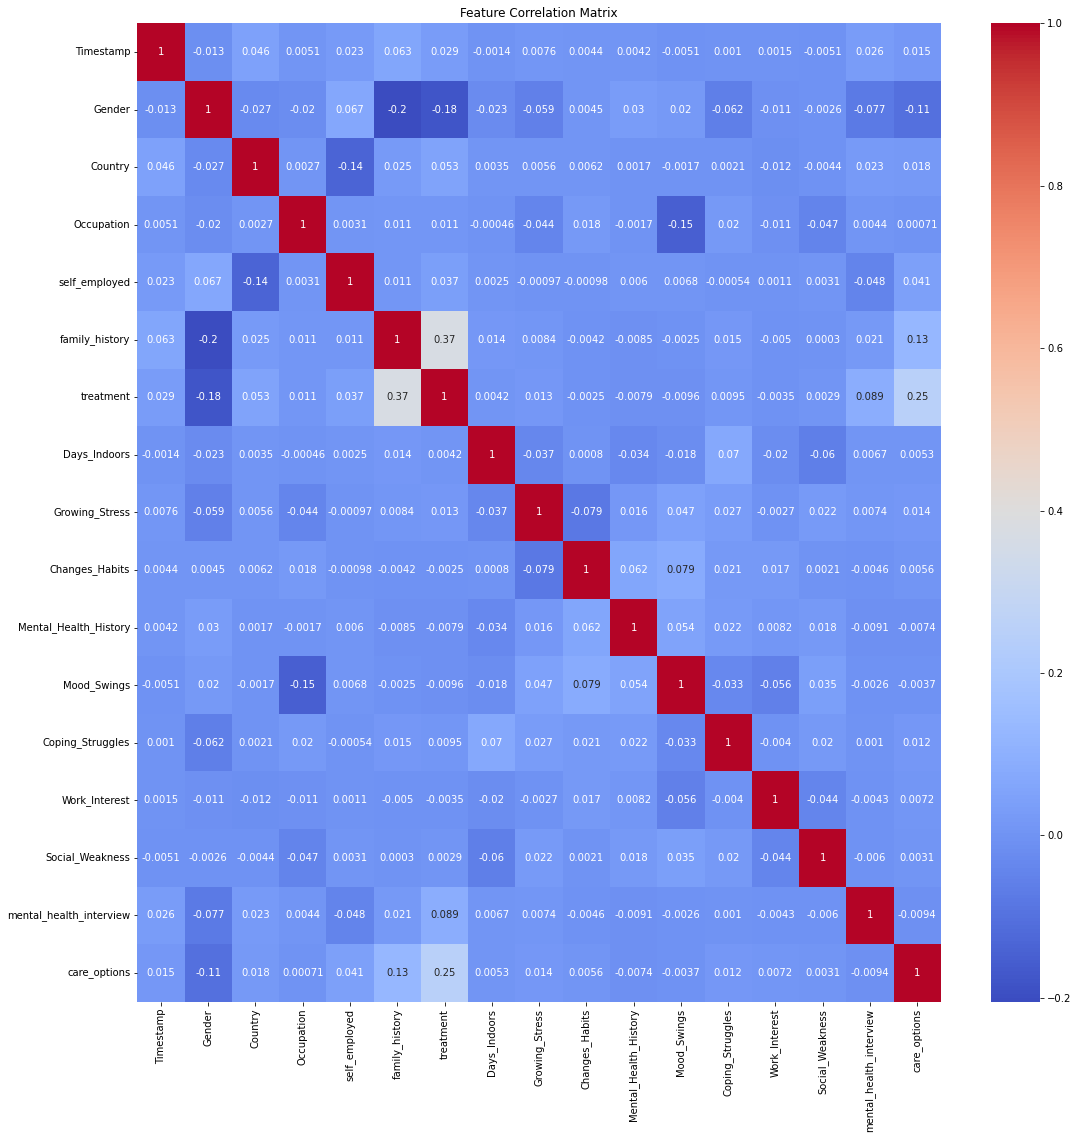

In [62]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
